## High-Level Dataset Summary

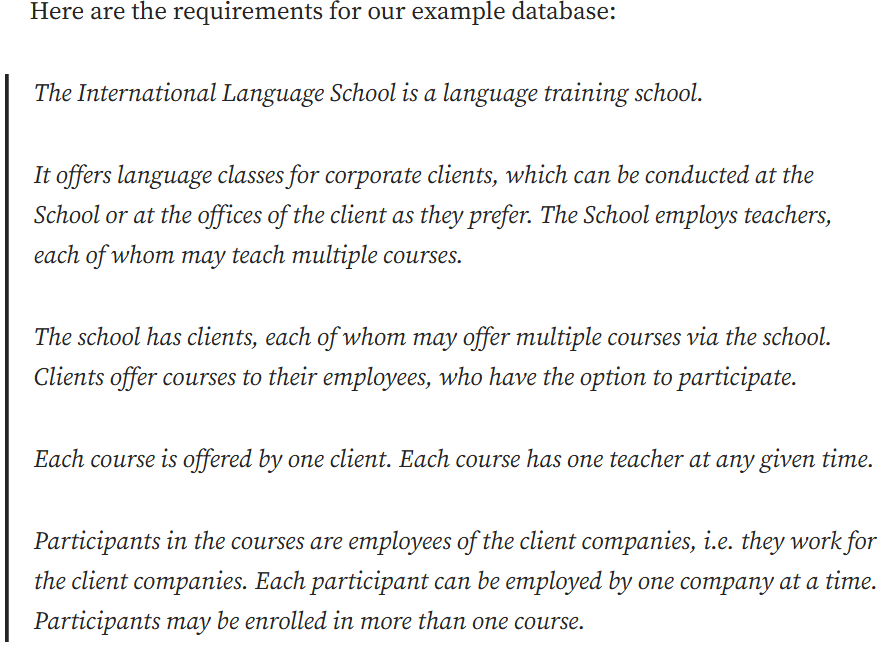

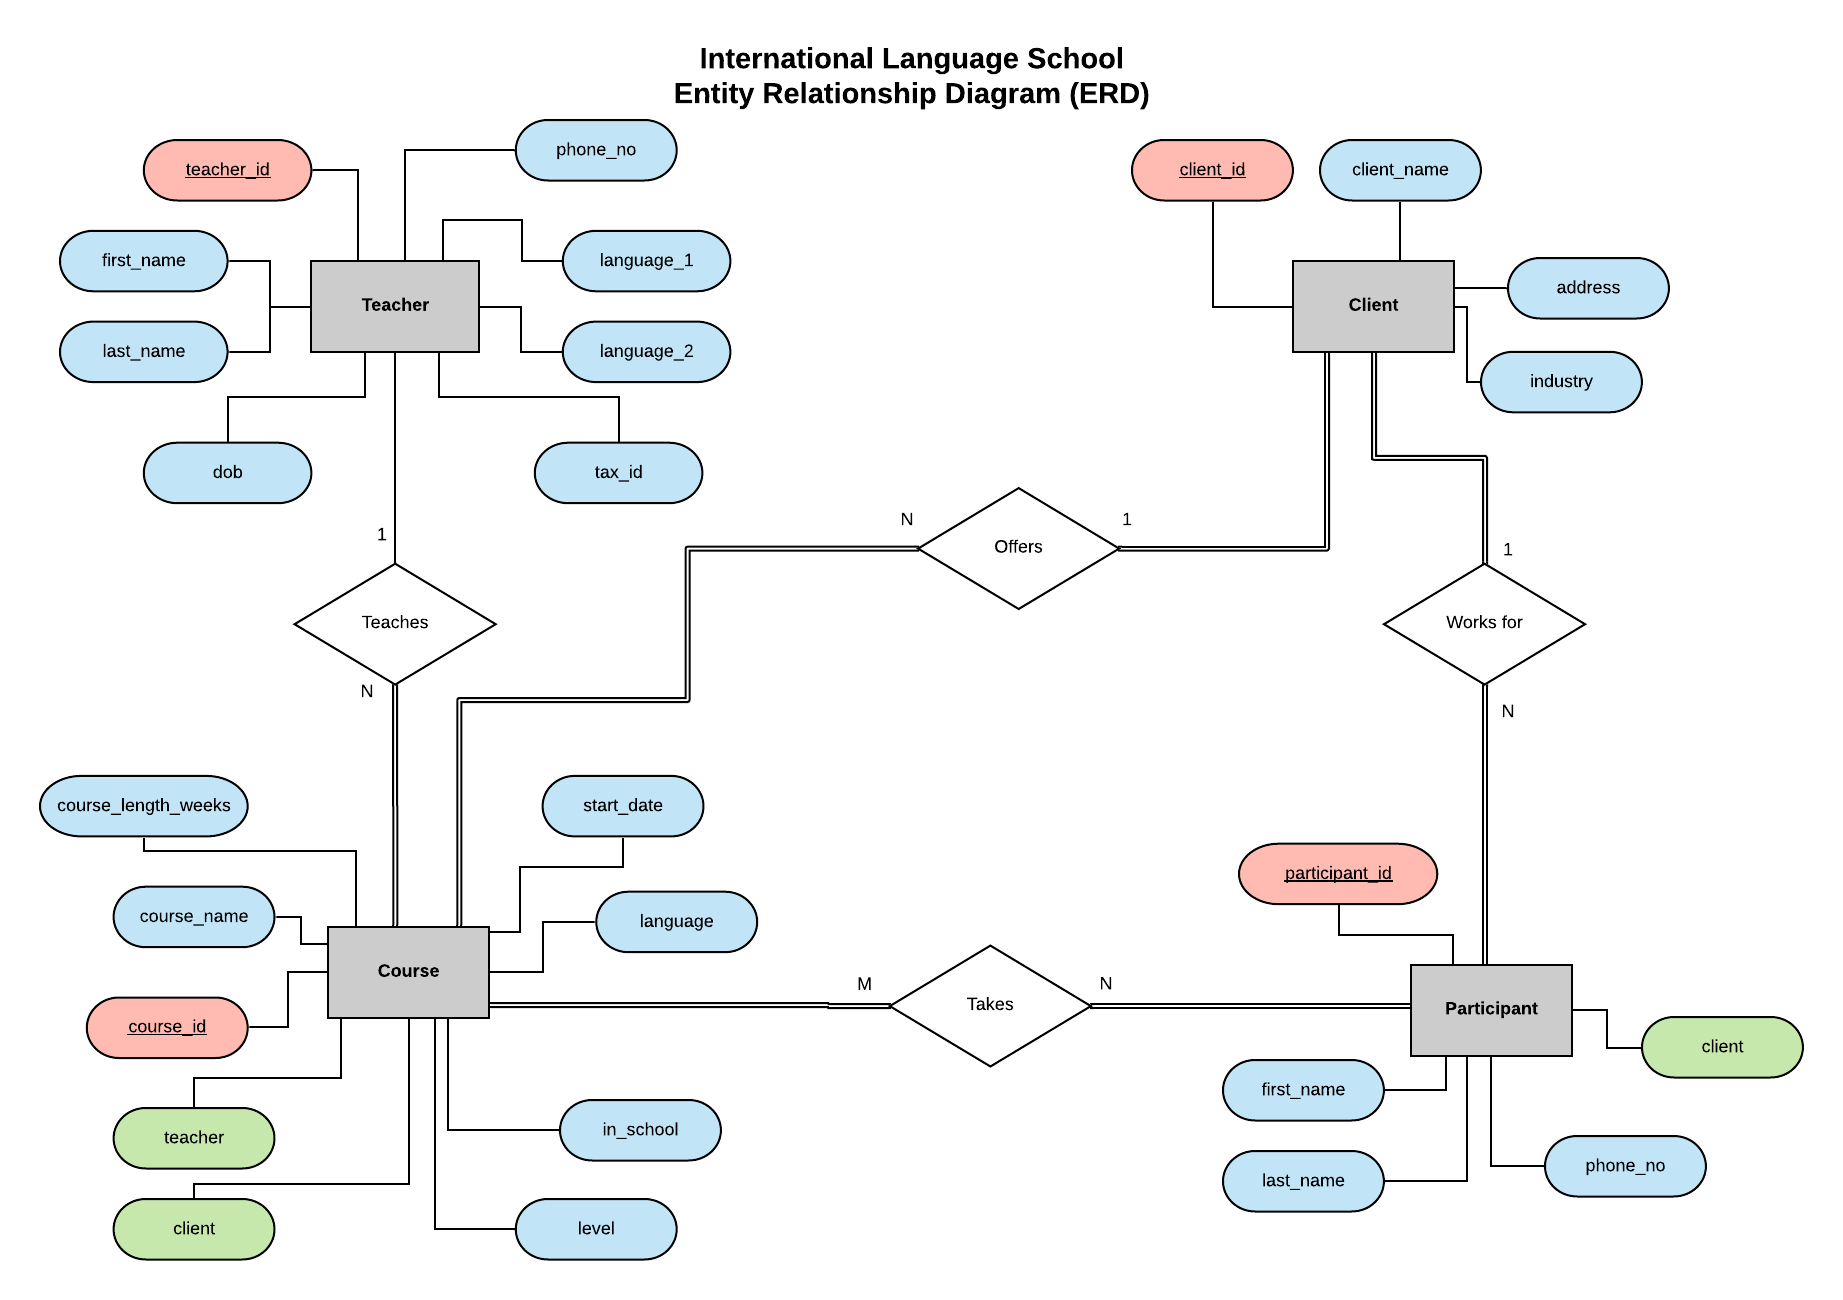

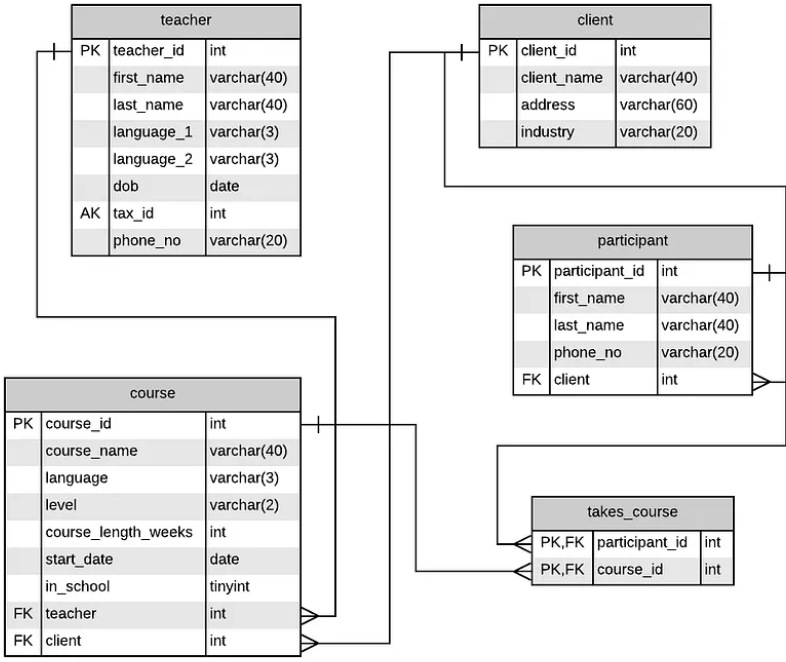

## References

- __[FreeCodeCamp](https://www.freecodecamp.org/news/connect-python-with-sql/)__
- __[Markdown Cheat Sheet](https://www.kaggle.com/code/cuecacuela/the-ultimate-markdown-cheat-sheet)__
- __[JupyterNotebook Variables](https://stackoverflow.com/questions/37718907/variable-explorer-in-jupyter-notebook)__
- __[TowardsDataScience](https://towardsdatascience.com/coding-and-implementing-a-relational-database-using-mysql-d9bc69be90f5)__

KIV
- https://dev.mysql.com/doc/connector-python/en/connector-python-tutorial-cursorbuffered.html

## Setup Libraries

In [16]:
# pip install mysql-connector-python

In [17]:
# pip install pandas

In [2]:
import mysql.connector
from mysql.connector import Error
import pandas as pd

## Input

In [4]:
host_name     = "localhost"
user_name     = "root"
user_password = "Ph0t0sh0p!40150"
db_name       = "school"

## Connecting to MySQL Server
- __[mysql.connector.connect](https://dev.mysql.com/doc/connector-python/en/connector-python-connectargs.html)__

In [6]:
def create_server_connection(host_name, user_name, user_password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

In [8]:
connection = create_server_connection(host_name,user_name,user_password)

MySQL Database connection successful


## Creating a New Database in MySQL

In [10]:
def create_database(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("Database created successfully")
    except Error as err:
        print(f"Error: '{err}'")

In [12]:
db_query = "CREATE DATABASE " + db_name

create_database(connection,db_query)

Error: '1007 (HY000): Can't create database 'school'; database exists'


## Connecting to the Database in MySQL

In [40]:
def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

In [102]:
connection = create_db_connection(host_name,user_name,user_password,db_name)

MySQL Database connection successful


## Creating a Query Execution Function

In [50]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

## Creating Tables in MySQL

In [129]:
# Queries
db_query = ["""
            CREATE TABLE teacher (
              teacher_id INT PRIMARY KEY,
              first_name VARCHAR(40) NOT NULL,
              last_name VARCHAR(40) NOT NULL,
              language_1 VARCHAR(3) NOT NULL,
              language_2 VARCHAR(3),
              dob DATE,
              tax_id INT UNIQUE,
              phone_no VARCHAR(20)
              );
            """, 
            """
              CREATE TABLE client (
              client_id INT PRIMARY KEY,
              client_name VARCHAR(40) NOT NULL,
              address VARCHAR(60) NOT NULL,
              industry VARCHAR(20)
               );
            """,
            """
              CREATE TABLE participant (
              participant_id INT PRIMARY KEY,
              first_name VARCHAR(40) NOT NULL,
              last_name VARCHAR(40) NOT NULL,
              phone_no VARCHAR(20),
              client INT
              );
            """,
            """
            CREATE TABLE course (
              course_id INT PRIMARY KEY,
              course_name VARCHAR(40) NOT NULL,
              language VARCHAR(3) NOT NULL,
              level VARCHAR(2),
              course_length_weeks INT,
              start_date DATE,
              in_school BOOLEAN,
              teacher INT,
              client INT
              );
            """]

# Produce Tables
for x in range(len(db_query)):
    execute_query(connection,db_query[x])

Query successful
Query successful
Query successful
Query successful


## Create Relationships in MySQL

In [132]:
# Queries
db_query = [# 1-to-many relationships // primary key -> foreign key
            """
            ALTER TABLE participant
            ADD FOREIGN KEY(client)
            REFERENCES client(client_id)
            ON DELETE SET NULL;
            """, 
            """
            ALTER TABLE course
            ADD FOREIGN KEY(teacher)
            REFERENCES teacher(teacher_id)
            ON DELETE SET NULL;
            """,
            """
            ALTER TABLE course
            ADD FOREIGN KEY(client)
            REFERENCES client(client_id)
            ON DELETE SET NULL;
            """,
            # many-to-many relationships // composite key
            """
            CREATE TABLE takes_course (
            participant_id INT,
            course_id INT,
            PRIMARY KEY(participant_id, course_id),
            FOREIGN KEY(participant_id) REFERENCES participant(participant_id) ON DELETE CASCADE,
            FOREIGN KEY(course_id) REFERENCES course(course_id) ON DELETE CASCADE
            );
            """]

# ON DELETE SET NULL: This tells MySQL what we want to do when a record in the client table is deleted — in this case 
#                     the value of the client attribute for that participant will be set to NULL, but the record will 
#                     remain in the participants table. 
# ON DELETE CASCADE:  If we used this here then when a record is deleted from the client table all participants linked 
#                     to that client via this foreign key relationship would also be deleted.

# Produce Relationships
for x in range(len(db_query)):
    execute_query(connection,db_query[x])

Query successful
Query successful
Query successful
Query successful


## Fetch Data into JupyterLab from Database in MySQL

In [140]:
# Fecthall function
def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error: '{err}'")

In [144]:
# Queries
db_query = """
              SELECT course.course_id, course.course_name, course.language, client.client_name, client.address
              FROM course
              JOIN client
              ON course.client = client.client_id
              WHERE course.in_school = FALSE;
           """

# Read data
results = read_query(connection, db_query)

# Print data
for result in results:
  print(result)

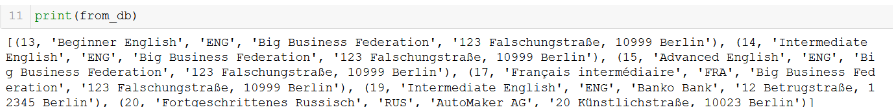

## Formatting Output into a pandas DataFrame

In [ ]:
# Returns a list of lists
from_db = []

for result in results:
  result = list(result)
  from_db.append(result)

# Produce a pandas DataFrame
columns = ["course_id", "course_name", "language", "client_name", "address"]
df = pd.DataFrame(from_db, columns=columns)

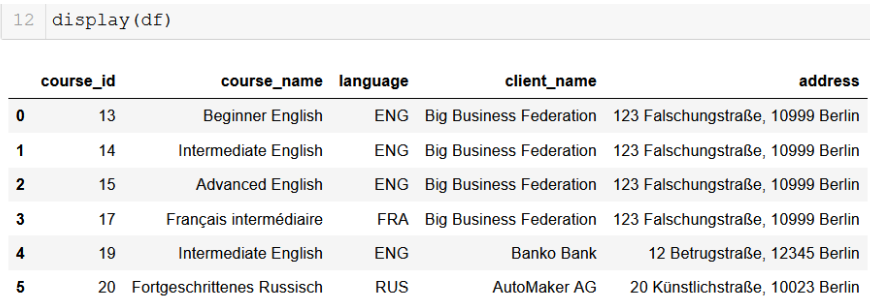